# Testing PCA Model

In [25]:
# Packages used for developing models, as well as processing information

from IPython import get_ipython
from IPython.display import display
# %%
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay
import plotly.express as px


filterwarnings('ignore')

In [26]:
#Reading the database and checking some information
#I purposely eliminated some information from the data set so that I could apply methods to fill
#in empty fields and transform text data into numeric values.

Dataset = pd.read_csv('breast_cancer.csv',sep=';', on_bad_lines='skip')
Dataset.info()
Dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              565 non-null    float64
 1   mean texture             566 non-null    float64
 2   mean perimeter           566 non-null    float64
 3   mean area                568 non-null    float64
 4   mean smoothness          566 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,565.000000,566.000000,566.000000,568.000000,566.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,711.656867,19.291343,91.869399,654.637500,0.096259,0.104341,0.088799,0.048919,0.181162,0.062798,...,315.194921,25.677223,107.261213,880.583128,0.132369,2.111808,4.410401,0.114606,0.290076,0.083946
std,2438.148614,4.309063,24.290511,352.173096,0.013926,0.052813,0.079720,0.038803,0.027414,0.007060,...,1655.459336,6.146258,33.602542,569.356993,0.022832,44.343334,69.928599,0.065732,0.061867,0.018061
min,7.760000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,12.200000,16.172500,75.065000,420.175000,0.086380,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.180000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.850000,18.835000,86.140000,548.750000,0.095865,0.092630,0.061540,0.033500,0.179200,0.061540,...,15.150000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,17.600000,21.807500,104.025000,782.625000,0.105250,0.130400,0.130700,0.074000,0.195700,0.066120,...,19.850000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9904.000000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,9981.000000,49.540000,251.200000,4254.000000,0.222600,1058.000000,1252.000000,0.291000,0.663800,0.207500


# Checking Some Measurements

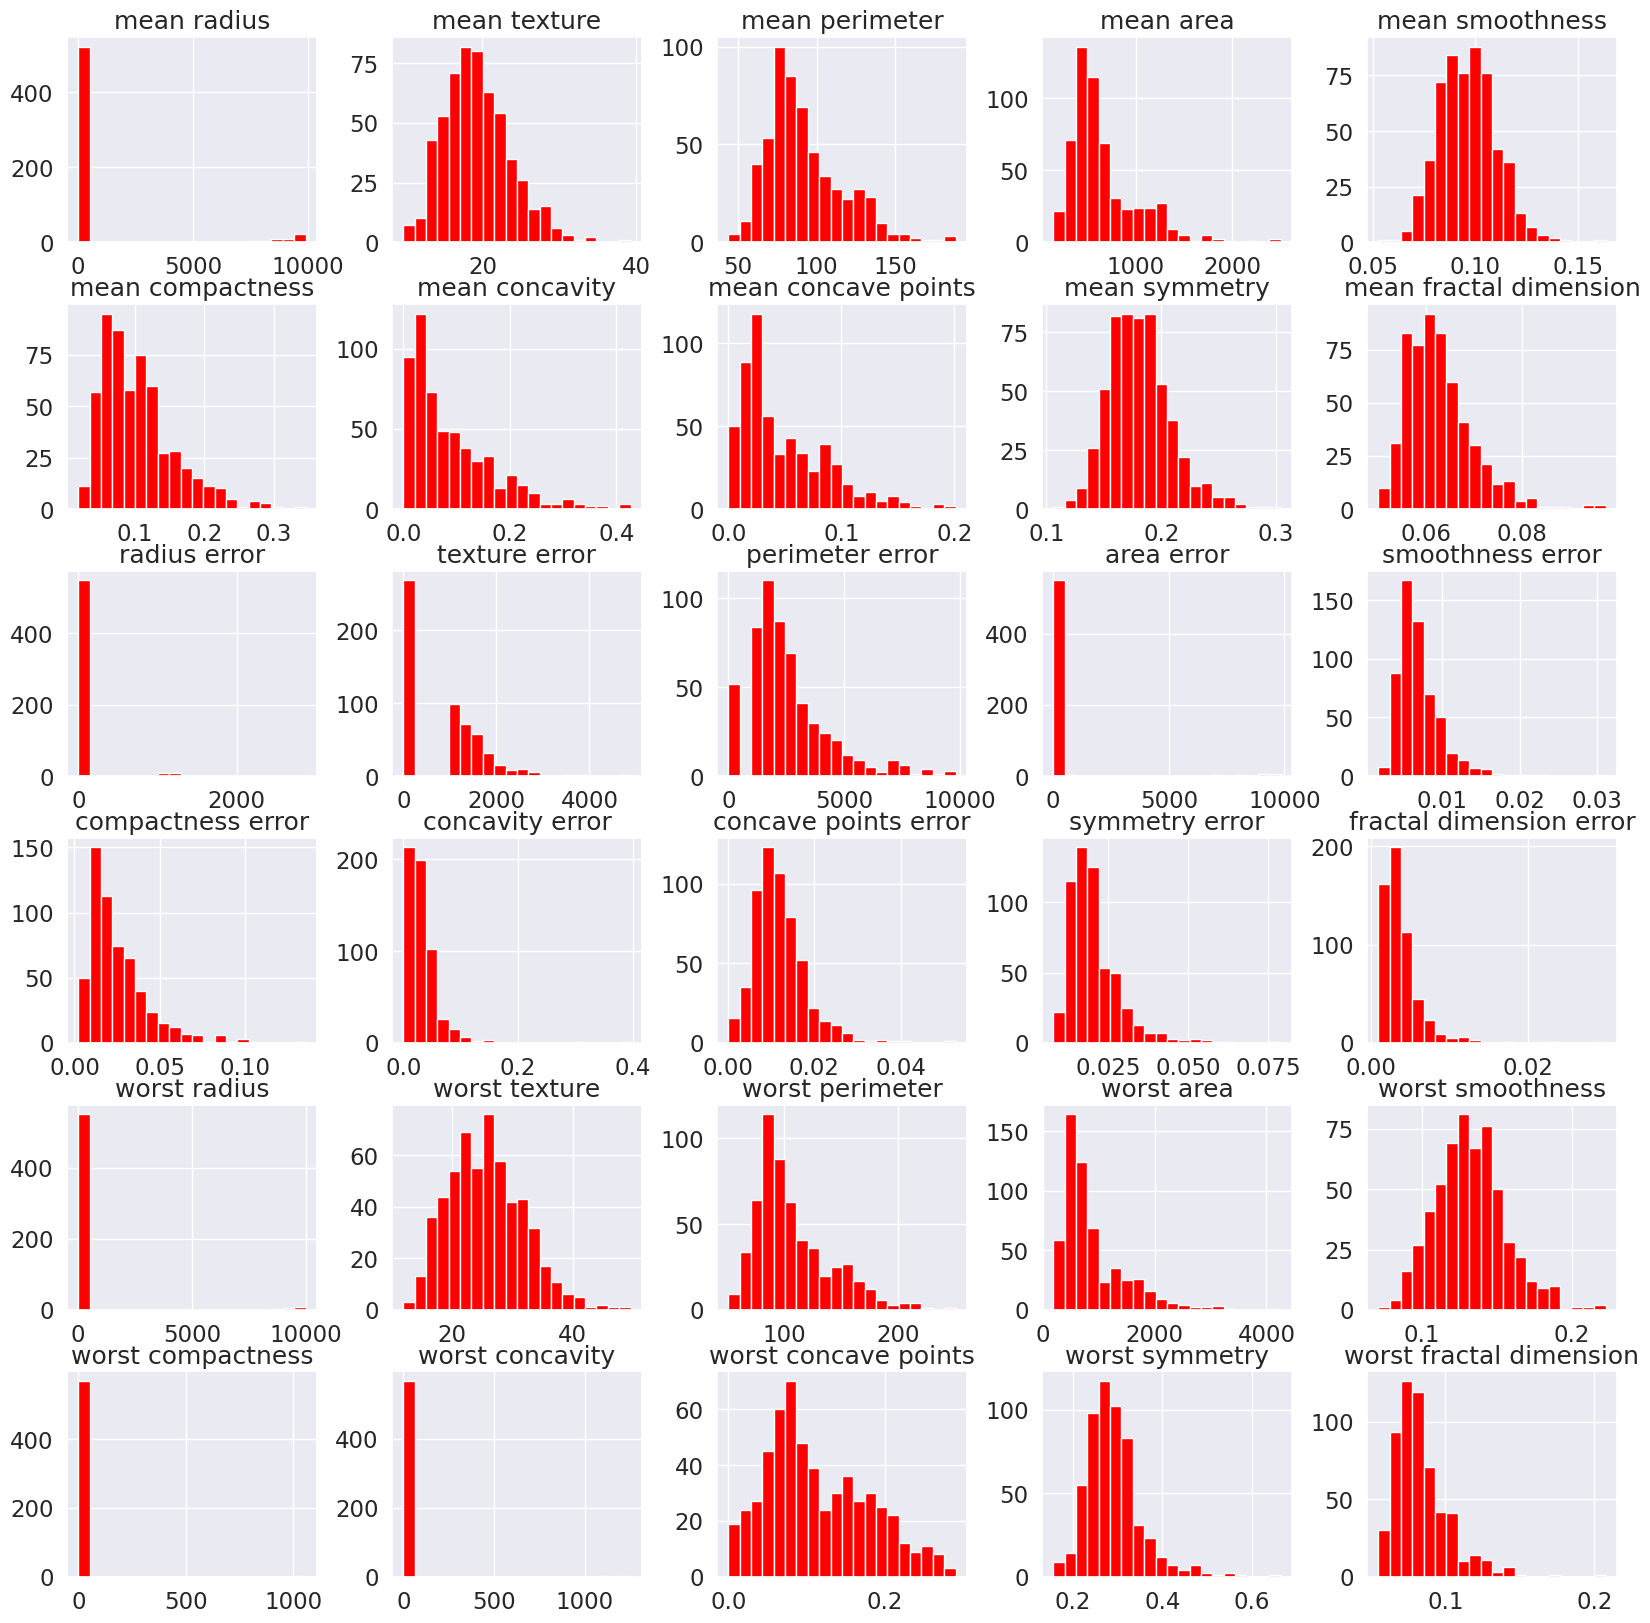

In [27]:
sns.set(font_scale=1.5,rc={'figure.figsize':(20,20)}) #usando a biblioteca sns posso verificar algumas distribuições dos meus dados
eixo=Dataset.hist(bins=20,color='red')

# Processing Some Variables

In [28]:
# select objetc columns and transform into float values
textos =Dataset.select_dtypes(include=['object']).columns
for column in textos:
  if column not in ['target','Family Case']:
    Dataset[column] = Dataset[column].str.replace(',', '.').astype(float)
Dataset.select_dtypes(include=['object']).columns

Index(['Family Case', 'target'], dtype='object')

In [29]:
#my target variable is a text, so to use it in my model I select the information and assign 1 to a case and 0 to the negative of my case
a=Dataset.columns[Dataset.isna().any()].tolist()
b=Dataset.columns
c=list(Dataset.select_dtypes(include=['object']).columns)
c.remove('target')
d=Dataset.columns

X = Dataset.iloc[:,:-1].values
y = Dataset.iloc[:,-1].values

# Instead of using 'target' as a string index, get the index of the 'target' column
target_index = Dataset.columns.get_loc('target')

info_target=[]
# Access the column data using the target_index
col_data = pd.Series(y)
for elemento in list(col_data.unique()):
    info_target.append(elemento)

for k in range(0,len(col_data)):
  if col_data[k]==info_target[0]:
    col_data[k]=0
  else:
    col_data[k]=1
y = col_data.values

In [30]:
#In this step I select my data set and transform other text variables into numeric ones to facilitate the processing of my model.
ids=[]
for k in range(0,len(b)):
   if b[k] in a:
    ids.append(k)
#Include mean in spots without values, I can use other types of methods.
if ids !=[]:
  imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
  imputer= imputer.fit(X[:,ids])
  X[:,ids]=imputer.transform(X[:,ids])


Lista_variaveis=[]
Lista_dummies=[]

objetos =[]
variavel_final=[]
for k in range(0,len(b)):
   if b[k] in c:
    objetos.append(k)

if objetos!=[]:
    # Convert X to a DataFrame for easier manipulation
    X_df = pd.DataFrame(X, columns=Dataset.columns[:-1])

    # Perform one-hot encoding using Pandas get_dummies
    for col_index in objetos:
        dummy_df = pd.get_dummies(X_df.iloc[:, col_index], prefix=Dataset.columns[col_index], dtype='int')
        X_df = pd.concat([X_df, dummy_df], axis=1)
        Lista_dummies.extend(dummy_df.columns)  # Add dummy column names

    # Drop original categorical columns
    X_df = X_df.drop(columns=Dataset.columns[objetos])

    # Update Lista_variaveis with dummy columns and remaining features
    Lista_variaveis = list(X_df.columns[~X_df.columns.isin(Lista_dummies)]) +Lista_dummies

    # Convert back to NumPy array if needed
    X = X_df.values
#X1= X2 = X3 = X.copy()

X =pd.DataFrame(data=X, columns=Lista_variaveis)
min_max_scaler =MinMaxScaler()
X = min_max_scaler.fit_transform(X)
#X=X.values
 #Another way of normalizing data into a 0-1 range

# Model Development and Results

In [41]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2)
yTrain = yTrain.astype(int) # Convert to integer type to avoid "unknown label type" error.
yTest = yTest.astype(int) # Convert to integer type to avoid "unknown label type" error.

log_para=[{'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],'max_iter':[10,20,50,100,150,200]}]
log = GridSearchCV(LogisticRegression(), log_para, cv=3)
log.fit(XTrain,yTrain)
print('Best Parameters',log.best_params_)

for k in range(2,len(Lista_variaveis)//2):
  XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2)
  yTrain = yTrain.astype(int) # Convert to integer type to avoid "unknown label type" error.
  yTest = yTest.astype(int) # Convert to integer type to avoid "unknown label type" error.
  pca=PCA(n_components=k)
  XTrain = pca.fit_transform(XTrain)
  XTest = pca.transform(XTest)

  model = LogisticRegression(solver=log.best_params_['solver'],max_iter=log.best_params_['max_iter'])
  model.fit(XTrain, yTrain)
  model.score(XTest, yTest)
  print('Number of components',k)
  print('\nVariance')
  print(sum(pca.explained_variance_ratio_))
  print('\n')
  print('Score Model',model.score(XTest, yTest))
  print('\n')
  probs = np.round(model.predict_proba(XTest)[:,1], 7)
  fpr, tpr, thresholds = roc_curve(yTest, probs)
  #Performs the two-sample Kolmogorov-Smirnov test for goodness of fit.
  #This test compares the underlying continuous distributions F(x) and G(x) of two independent samples
  print('KS de Validation: {0:.2f}% e AUC: {1:.2f}%'.format(stats.ks_2samp(fpr, tpr)[0] * 100.0, auc(fpr, tpr) * 100))
  print((probs.max(),probs.min()))

  probs = np.round(model.predict_proba(XTrain)[:,1], 7)
  fpr, tpr, thresholds = roc_curve(yTrain, probs)
  print('KS de Development: {0:.2f}% e AUC: {1:.2f}%'.format(stats.ks_2samp(fpr, tpr)[0] * 100.0, auc(fpr, tpr) * 100))
  print((probs.max(),probs.min()))


Best Parameters {'max_iter': 10, 'solver': 'lbfgs'}
Number of components 2

Variance
0.49489020938764317


Score Model 0.9385964912280702


KS de Validation: 78.57% e AUC: 98.96%
(0.9969819, 0.000126)
KS de Development: 90.38% e AUC: 97.43%
(0.9984008, 4.69e-05)
Number of components 3

Variance
0.6195926055715092


Score Model 0.9385964912280702


KS de Validation: 81.25% e AUC: 97.84%
(0.9997061, 5.38e-05)
KS de Development: 91.67% e AUC: 99.20%
(0.9998201, 1.66e-05)
Number of components 4

Variance
0.6826588238604452


Score Model 0.9385964912280702


KS de Validation: 78.57% e AUC: 98.47%
(0.9995805, 0.0001355)
KS de Development: 90.62% e AUC: 99.07%
(0.9997282, 1.61e-05)
Number of components 5

Variance
0.7361557298436807


Score Model 0.9385964912280702


KS de Validation: 70.00% e AUC: 98.89%
(0.9988661, 0.0001217)
KS de Development: 91.67% e AUC: 99.00%
(0.9996313, 1.05e-05)
Number of components 6

Variance
0.7774292368095294


Score Model 0.9210526315789473


KS de Validation: 

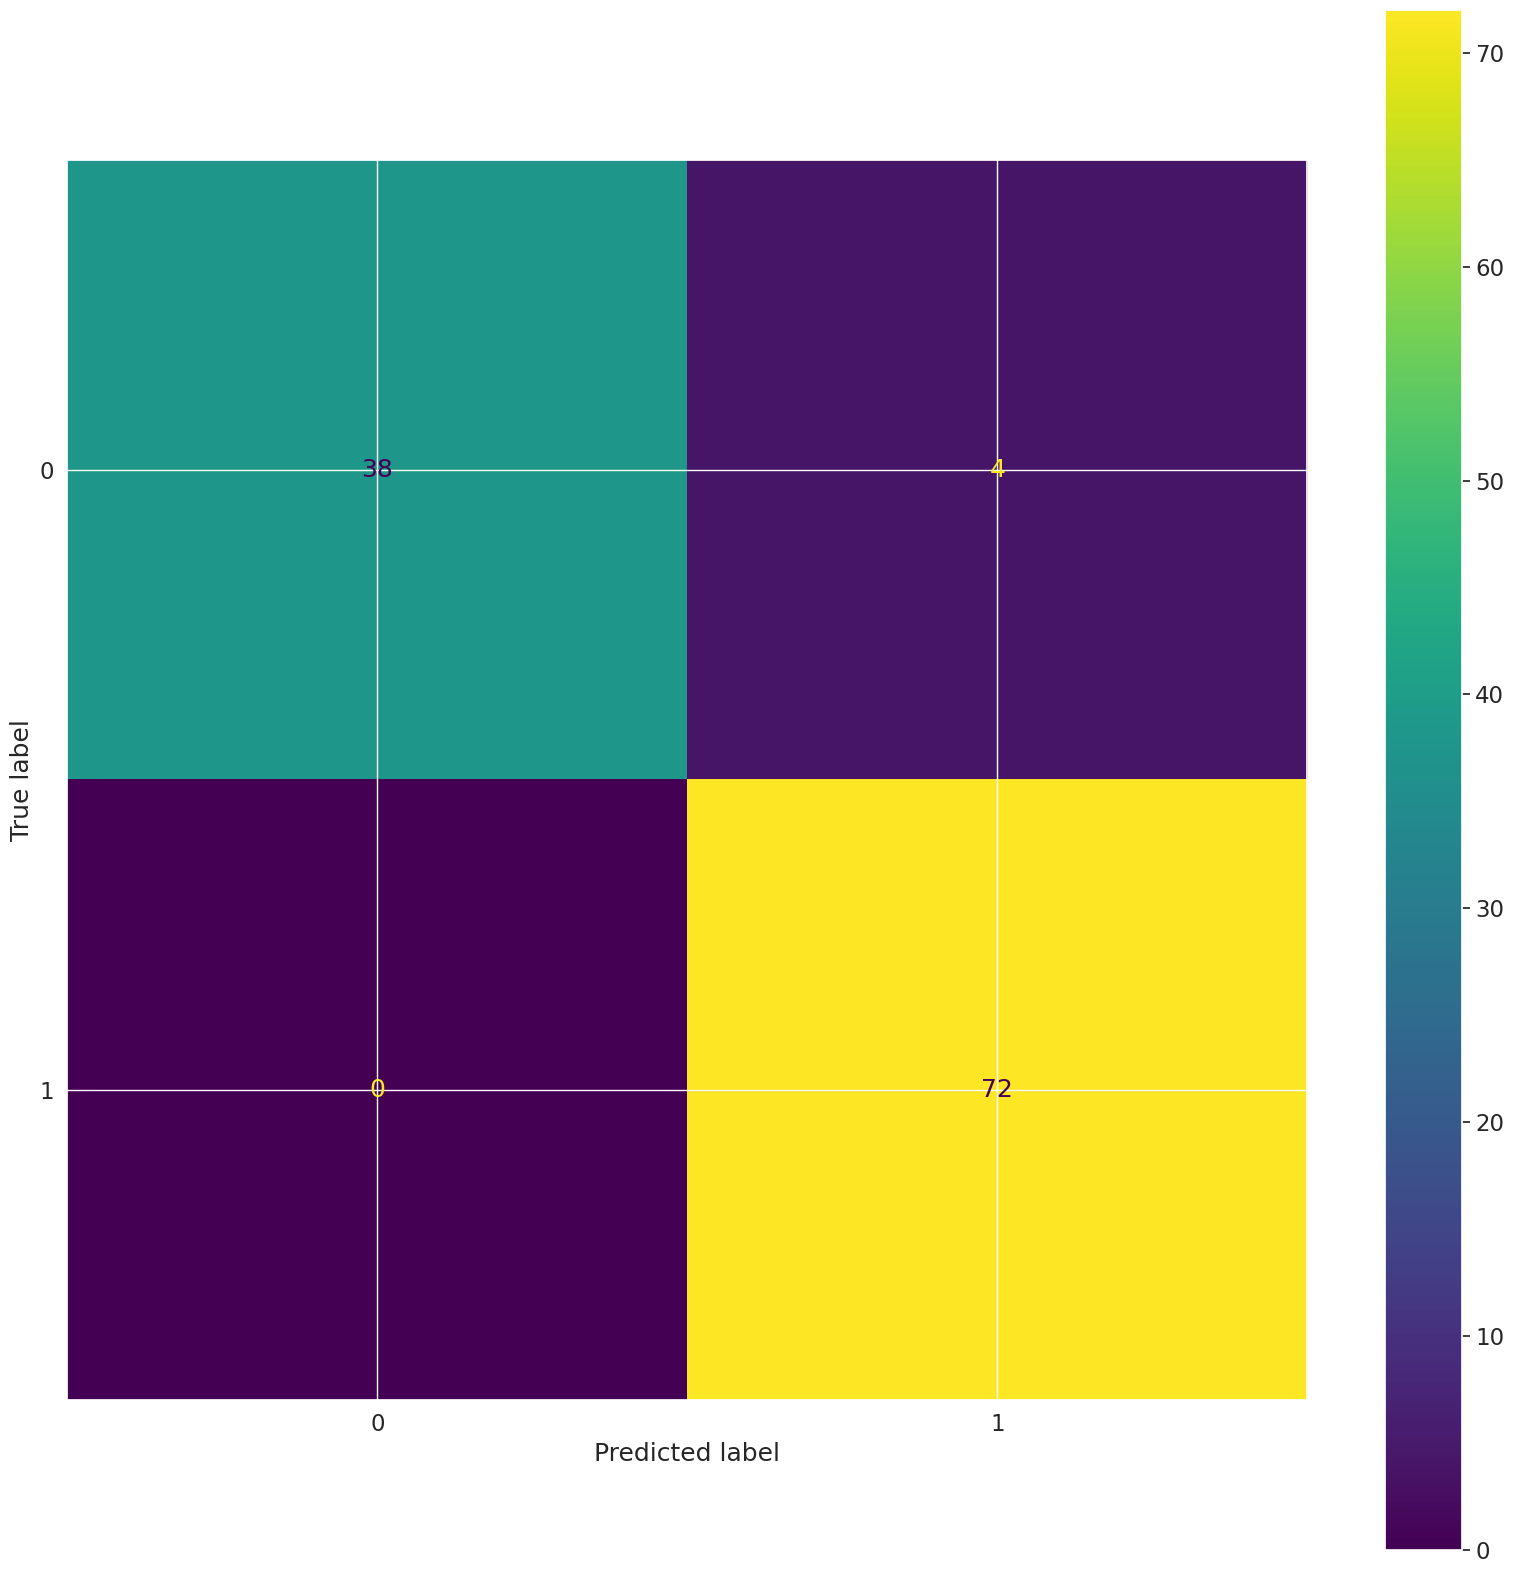

In [39]:
ConfusionMatrixDisplay.from_estimator(model, XTest, yTest)

In [ ]:

pca=PCA(n_components=3)
pca.fit(XTest)
X_pca=pca.transform(XTest)
base=pd.DataFrame(data=X_pca,columns=['PC1','PC2','PC3'])
base['Cluster']=model.predict(XTest)
base
color_theme = np.array(['red','green'])


In [59]:
df = base
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3',
              color=color_theme[base['Cluster']])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()